
TFG

Este es el codigo del tfg de Borja Jimeno

En esta primera celda vamos a definir todas las funciones y variables que necesitaremos para calcular el ritmo teórico. Cada función está explicada al inicio y cada variable tiene asociadas sus unidades en un comentario a la derecha.  

Para la realización de las funciones se ha tomado como referencia:  
-El pdf ('rateTutorial_MMartinez_TAE25.pdf)    
-El capítulo 7 de la Tesis de María ('tesisMaria_chap7.pdf')   
-El artículo 'Inelastic and Elastic Scattering of 187-Mev Electrons from Selected Even-Even Nuclei - Richard Helm - PHISICAL REVIEW VOLUME 104, NUMBER 5 DECEMBER 1, 1956'  
-Para calcular el Quenching Factor, Sección 4.3.2 de la tesis de Tamara Pardo Yanguas ('Tesis-Tamara.pdf')



In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy import special
from scipy.stats import norm

from funciones_ritmo_teorico import*
from funciones_ritmo_exp import*


plt.rcParams['font.size'] = 18



En este codigo vamos a calcular el ritmo diferencial de interaccion de un WIMP en el detector. Sabemos que el ritmo esperado en el detector debe ser proporcional al numero de nuclos blanco ($N_T$), a la densidad numerica de WIMPs ($n_\chi$), al promedio de la velcidad relativa entre el WIMP y el detector ($\langle v \rangle$) y a la seccion eficaz ($\sigma$):

$$R\approx N_T \times n_{\chi} \times \langle v \rangle \times \sigma = \frac{M_{det}}{m_N} \times \frac{\rho_{\chi}}{m_{\chi}}  \times \int_0^\infty vf(v)d^3v \times \sigma \phantom{asd} \left[cts\cdot s^{-1}\right]$$

Donde:

$M_{det}$ es la masa del detector.\
$m_{N}$ es la masa nuclear.\
$\rho_{\chi}$ es la densidad de WIMPs.\
$m_{\chi}$ es la masa del WIMP.

De esta expresion, se puede obtener el ritmo diferencial por unidad de energia de retroceso:
$$\frac{dR}{dE_R}=\frac{M_{det}}{m_N}\frac{\rho_{\chi}}{m_{\chi}}\int^{\infty}_{0}vf(v)\frac{d\sigma}{dE_R}(v,E_R)d^3v \phantom{asd} $$

Asumiremos ciertas condiciones que nos ayudan a simplificar esta ultima formula:

Dado que los detectores tienen un umbral de energia $E_R$, existe una velocidad minima de los WIMPS que interactuan con los detectores, por lo que el limite inferior de la integral ya no es $0$ si no que es $v_{min}=\sqrt{\frac{E_R m_N}{2\mu^2_{\chi N}}}$.En la expresion, $\mu^2_{\chi N}=\frac{m_N m_{\chi}}{m_N + m_{\chi}}$ es la masa reducida del sistema nucleo-WIMP, con $m_N$ la masa del nucleo.

En cuanto a la velocidad maxima, se toma la velocidad de escape de la galxia $v_{esc}$

Desarrollando la expresion de la seccion eficaz diferencial, se puede expresar como el producto de la seccion eficaz puntual por un factor de forma nuclear. Si ademas asumimos que la interaccion es Spin Independent, llegamos a la sigueinte expresion:

$$\frac{d\sigma}{dE_R}(v,E_r)=\frac{d\sigma}{dE_R}(v,0)F^2(q)=\frac{m_N}{2\mu^2_{\chi N}v^2}\frac{m_N A^2 \mu^2_{\chi N}}{\mu^2_{\chi n}}\sigma_{SI}F^2(q)=\frac{m_N A^2 \sigma_{SI} F^2(q)}{2 v^2 \mu^2_{\chi n}}$$

Por lo que la integral del promedio de la velocidad queda:

$$\int^{\infty}_{0}vf(v)\frac{d\sigma}{dE_R}(v,E_R)d^3v=\frac{m_N A^2 \sigma_{SI} F^2(q)}{2 \mu^2_{\chi n}}\int^{v_{esc}}_{v_{min}}\frac{f(v,t)}{v^2}d^3v=\frac{m_N A^2 \sigma_{SI} F^2(q)}{2 \mu^2_{\chi n}} \eta (v_{min},t)$$

Trabajaremos con el modelo de halo estandar (SHM), por lo que la integral dada por $\eta (v_{min},t)$ es analitica. (Se vera mas adelante)

Con todo esto llegamos a la Master Formula:

## $$\frac{dR}{dE_R}=\frac{M_{det} \rho_{\chi}}{2 m_{\chi} \mu^2_{\chi n}}A^2 \sigma_{SI} F^2(q) \int^{v_{esc}}_{v_{min}}\frac{f(v,t)}{v}d^3v$$





### Unidades de la integral:
$$\frac{dR}{dE_R}=\frac{M_{det} \rho_{\chi}}{2 m_{\chi} \mu^2_{\chi n}}A^2 \sigma_{SI} F^2(q) \int^{v_{esc}}_{v_{min}}\frac{f(v,t)}{v}d^3v$$

$$M_{det} \phantom{d} \left[GeV\cdot c^{-2}\right] \phantom{asda} \rho_{\chi} \phantom{d} \left[\textup{WIMPS}\cdot GeV\cdot c^{-2} \cdot cm^-3\right] \phantom{asda} m_{\chi} \phantom{d} \left[GeV\cdot c^{-2}\right]$$

$$\mu^2_{\chi n} \phantom{d} \left[GeV\cdot c^{-2}\right]^2 \phantom{asda} \sigma_{SI} \phantom{d} \left[cm^2\right] \phantom{asda} \int^{v_{esc}}_{v_{min}}\frac{f(v,t)}{v}d^3v \phantom{d} \left[s\cdot km^{-1}\right]$$

$$F^2(q) \phantom{d} [\textup{Adimensional}] \phantom{asda} A^2 \phantom{d} [\textup{Adimensional}]$$




Calculamos las unidades de la expresion sin la integral:

$$\frac{M_{det} \rho_{\chi}}{2 m_{\chi} \mu^2_{\chi n}}A^2 \sigma_{SI} F^2(q) \rightarrow \frac{\left[GeV\cdot c^{-2}\right]\left[\textup{cts}\cdot GeV\cdot c^{-2} \cdot cm^{-3}\right]}{\left[GeV\cdot c^{-2}\right]\left[GeV\cdot c^{-2}\right]^2 }\cdot cm^2 \rightarrow \left[\textup{cts}\cdot c^2 \cdot GeV^{-1} \cdot cm^{-1}\right]$$

Sustituimos el valor de $c^2$ en  $ \left[ m\cdot s^{-1} \right]$

$$\left[\textup{cts}\cdot c^2 \cdot GeV^{-1} \cdot cm^{-1}\right] \rightarrow  \left(3\cdot 10^8\right)^2 \left[\textup{cts}\cdot m^2 \cdot s^{-2} \cdot GeV^{-1} \cdot cm^{-1}\right] \left[ 100 \cdot cm\cdot m^{-1}\right]\rightarrow 100\cdot\left(3\cdot 10^8\right)^2 \left[\textup{cts}\cdot m\cdot  s^{-2} \cdot GeV^{-1}\right] $$

Calculamos las unidades la expresion por completo, multiplicando lo anterior por las unidades de la integral:

$$\frac{M_{det} \rho_{\chi}}{2 m_{\chi} \mu^2_{\chi n}}A^2 \sigma_{SI} F^2(q) \int^{v_{esc}}_{v_{min}}\frac{f(v,t)}{v}d^3v \rightarrow 100\cdot\left(3\cdot 10^8\right)^2 \left[\textup{cts}\cdot m\cdot  s^{-2} \cdot GeV^{-1}\right] \left[ s \cdot km^{-1}\right]\left[ 1000^{-1} \cdot km\cdot m^{-1}\right]$$
$$\boxed{\frac{dR}{dE_R} \rightarrow \frac{\left(3\cdot 10^8\right)^2}{10} \left[\textup{cts}\cdot GeV^{-1}\cdot s^{-1}\right] }$$

Hacemos el cambio de unidades para pasar a $\left[\textup{cts}\cdot KeV^{-1} \cdot s^{-1}\right]$:

$$\frac{\left(3\cdot 10^8\right)^2}{10} \left[\textup{cts}\cdot GeV^{-1} s^{-1}\right] \cdot \left[1000^{-2}\cdot keV^{-1}\cdot GeV\right]\rightarrow \boxed{\frac{\left(3\cdot 10^8\right)^2}{10^7} \left[\textup{cts}\cdot keV^{-1} \cdot s^{-1}\right]}$$

Pasamos a $\left[\textup{cts}\cdot KeV^{-1} \cdot d^{-1}\right]$:

$$\frac{\left(3\cdot 10^8\right)^2}{10^7} \left[\textup{cts}\cdot keV^{-1} \cdot s^{-1}\right] \left[ 86400 \cdot s^{-1} \cdot d \right] \rightarrow \boxed{\left(3\cdot 10^8\right)^2\cdot 
\left(8.64\cdot 10^{-3} \right) \cdot \left[\textup{cts}\cdot keV^{-1} \cdot d^{-1}\right]}$$



## Integral por unidad de masa de detector

Dada la masa en kg del detector (suponiendo que esta formado por un unico material de numero masico $A$) $M^{'}_{det}$, tenemos que corresponden:

$$1000 \left[ g\cdot kg^{-1}\right] \cdot \frac{M^{'}_{det} \left[ kg \right]}{A \left[ g \cdot mol^{-1} \right]} = \boxed{1000 \cdot \frac{M^{'}_{det}}{A}  \left[ mol \right]} $$

Dado el numero de moles tenemos el siguiente numero de nucleos del material:

$$1000 \cdot \frac{M^{'}_{det}}{A}  \left[ mol \right] \cdot N_A  \left[ \textup{nucleos}\cdot mol^{-1} \right] = \boxed{1000 \cdot \frac{M^{'}_{det}}{A} \cdot N_A \left[ \textup{nucleos} \right]}$$

A partir de el numero de nucleos calculamos el numero de nucleones:

$$1000 \cdot \frac{M^{'}_{det}}{A} \cdot N_A \left[ \textup{nucleos} \right] \cdot A \left[ \textup{nucleones} \cdot \textup{nucleos}^{-1} \right] = \boxed{1000 \cdot \frac{M^{'}_{det}}{A} \cdot N_A \cdot A \left[ \textup{nucleones} \right]}$$

Con esta expresion podemos calcular la masa del detector en funcion de su masa en $\left[ kg \right]$, multiplicando por la masa de cada nucleon en $\left[ GeV\cdot c^{-2} \right]$

$$ M_{det}=1000 \cdot \frac{M^{'}_{det}}{A} \cdot N_A \cdot A \left[ \textup{nucleones} \right] \cdot m_n \left[ GeV \cdot c^{-2} \cdot \textup{nucleones}^{-1} \right] = \boxed{1000 \cdot \frac{M^{'}_{det}}{A} \cdot N_A \cdot A \cdot m_n \left[ GeV \cdot c^{-2} \right]}$$

Sustituyendo y dividiendo por la masa del detector en kg:

$$\frac{dR}{dE_R}=1000 \cdot \frac{M^{'}_{det}}{A} \cdot N_A \cdot A \cdot m_n \cdot \left[\frac{\rho_{\chi}}{2 m_{\chi} \mu^2_{\chi n}}A^2 \sigma_{SI} F^2(q) \int^{v_{esc}}_{v_{min}}\frac{f(v,t)}{v}d^3v\right] \left[\textup{cts}\cdot keV^{-1} \cdot d^{-1}\right]$$

$$\boxed{\frac{1}{M_{det}^{'}}\left(\frac{dR}{dE_R}\right)=\frac{1000  \cdot N_A \cdot m_n \cdot\rho_{\chi}}{2 m_{\chi} \mu^2_{\chi n}}A^2 \sigma_{SI} F^2(q) \int^{v_{esc}}_{v_{min}}\frac{f(v,t)}{v}d^3v \left[\textup{cts}\cdot keV^{-1} \cdot d^{-1} \cdot kg^{-1}\right]}$$

Esta es la funcion que implementamos en el codigo como **rate**:


In [2]:
#########################
#########################
# Ritmo total, integrado entre Ei y Ef (en cts/kg/d)
# Ei, Ef: Energias inicial y final en keV
# t: tiempo en dias desde el 22 de marzo
# A: numero masico
# mW: Masa del Wimp en GeV/c^2
# sigmaSI: Seccion eficaz spin independent en cm^2

def rate(E,t,A,mW,sigmaSI):
    Mdet=1000*NA*mn                                 # masa de 1 kg de detector [GeV/c^2]
    mu_n=mW*mn/(mW+mn)                              # masa reducida del sistema nucleon-WIMP [Gev/c^2]
    retval=Mdet*rho/2./mW/mu_n/mu_n*A*A*sigmaSI     # Producto de los primeros terminos [cts*c^2/Gev/cm]
    retval*=c*c                                     # Conversion a 100*[cts*m/s^2/Gev]
    retval*=FF(E,A)                                 # Multiplicamos por factor de forma atomico (Adimensional) 100*[cts*m/s^2/Gev]
    retval*=eta(E,t,A,mW)                           # Multiplicamos por integral 0.1*[cts/GeV/s]
    retval*=8.64e-3                                 # Convertimos a [cts/KeV/d]

    return retval


### Ejemplo
Sacamos graficas para familiarizarnos con las funciones definidas en la parte superior.\
Calculamos el ritmo teórico diferencial para diferentes blancos. En este caso para Na, I y NaI. Tomaremos como referencia un dia promedio (timeAvg) y un valor cualquiera de masa de WIMP y de seccion eficaz.

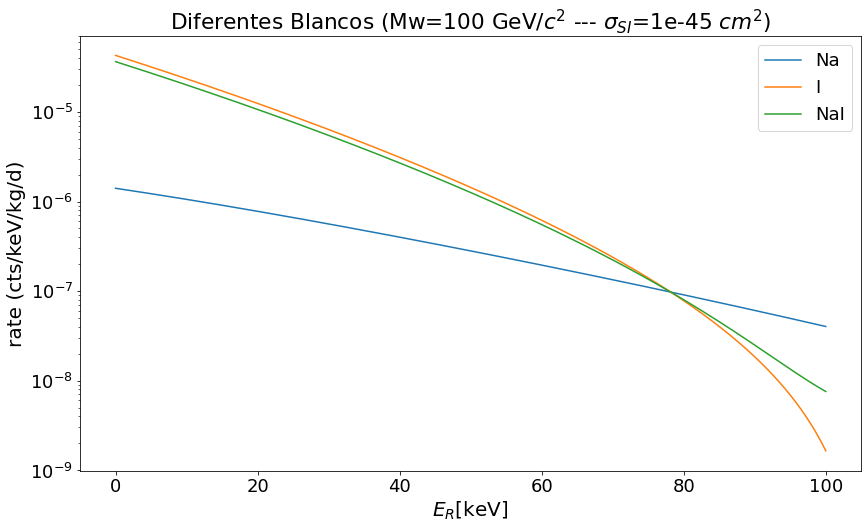

In [3]:

# Dia promedio

timeMax=72.9 
timeMin=255.5 
timeAvg=(timeMax+timeMin)/2.

#Valores cualquiera de masa del WIMP y de la seccion eficaz

mW=100          #   masa wimp (geV/c^2)
si=1e-45        #   seccion eficaz SI(cm^-2)

#Vector con los diferentes valores de la energia, entre 0 y 100 keV y con una resolucion de 0.1 keV)

ene=np.arange(0,100,0.1)

#Calculamos los valores del ritmo diferencial

rateNa=np.array([rate(e,timeAvg,23,mW,si) for e in ene])
rateI=np.array([rate(e,timeAvg,127,mW,si) for e in ene])
rate_NaI=np.array([RateNaI(e,timeAvg,mW,si) for e in ene])

#Dibujamos

plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(ene,rateNa, label = "Na")
ax.plot(ene,rateI, label = "I")
ax.plot(ene,rate_NaI, label = "NaI")
ax.set_title(r'Diferentes Blancos (Mw=' + str(np.round(mW)) + ' GeV/$c^2$ --- $\sigma_{SI}$=' + str(si) + ' $cm^2$)')
ax.set_ylabel(r'rate (cts/keV/kg/d)',fontsize=20)
ax.set_xlabel(r'$E_{R}$'+ '[keV]',fontsize=20)
ax.legend()
ax.set_yscale("log")

## Obtencion del ritmo en una ventana de energia

Tenemos que hacer la integral del ritmo diferencial. Para implementarlo en el codigo, simplemente sumamos en todos los valores y multiplicamos por el ancho del intervalo de integracion:

$$R\left[  \textup{cts}\cdot d^{-1} \cdot kg^{-1}\right]=\int_{E_{inf}}^{E_{sup}} \frac{1}{M_{det}^{'}}\left(\frac{dR}{dE_R}\right)dE \approx  \sum_{i=E_{inf}}^{E_{sup}} \frac{1}{M_{det}^{'}}\left(\frac{dR}{dE_R}\right)_i \cdot \Delta E $$

Como tomamos que el ancho del intervalo de integracion es el mismo para toda la suma, puede salir fuera del sumatorio:

$$R\left[  \textup{cts}\cdot d^{-1} \cdot kg^{-1}\right]=\Delta E \sum_{i=E_{inf}}^{E_{sup}}  \frac{1}{M_{det}^{'}}\left(\frac{dR}{dE_R}\right)_i $$

Esta es la funcion que implementamos en el codigo como **totalRate**:


In [4]:
#########################
#########################
# Ritmo total, integrado entre Ei y Ef (en c/kg/d)
# Ei, Ef: Energias inicial y final en keV
# t: tiempo en dias desde el 22 de marzo
# A: numero masico
# mW: Masa del Wimp en GeV/c^2
# sigmaSI: Seccion eficaz spin independent en cm^2

def totalRate(Ei,Ef,t,A,mW,sigmaSI):
  ene=np.arange(Ei,Ef,0.1)
  rates=np.array([rate(e,t,A,mW,sigmaSI) for e in ene])
  return rates.sum()*0.1

Para el caso del NaI, donde tenemos un blanco compuesto por dos atomos diferentes, podemos expresar la masa del detector como:

$$M_{det}=\frac{1}{\textup{mol}}\sum_{el}N^{el}_T m^{el}_N$$

Donde $mol$ es la masa molecular, $N^{el}_T$ el numero de nucleos de la especio $el$ y $m^{el}_N$ la masa nuclear de dicha especie.\
De esta forma se puede definir una funcion para calcular el ritmo de un blanco compuesto, teniendo en cuenta la proporcion en masa. Para el caso del NaI tenemos:

$$R_{NaI}=\frac{A_{Na} \cdot R_{Na} + A_{I} \cdot R_{I}}{A_{Na}+A_{I}}=\frac{23 \cdot R_{Na} + 127 \cdot R_{I}}{23+127} \left[  \textup{cts}\cdot d^{-1} \cdot kg^{-1}\right]$$

Esto lo definimos en la funcion **RateNaI**:

In [5]:
#########################
#########################
# Ritmo diferencial
# E en keV
# t: tiempo en dias desde el 22 de marzo
# mW: Masa del Wimp en GeV/c^2
# sigmaSI: Seccion eficaz spin independent en cm^2

def RateNaI(E,t,mW,sigmaSI):
    ratesNa=rate(E,t,23,mW,sigmaSI)
    ratesI=rate(E,t,127,mW,sigmaSI)
    return (23.*ratesNa+127.*ratesI)/(23.+127.)


Definimos a su vez otra funcion para realizar la integral empleando **RateNaI**:

In [6]:
#########################
#########################
# Ritmo total, integrado entre Ei y Ef (en c/kg/d)
# Ei, Ef: Energias inicial y final en keV
# t: tiempo en dias desde el 22 de marzo
# A: numero masico
# mW: Masa del Wimp en GeV/c^2
# sigmaSI: Seccion eficaz spin independent en cm^2

def totalRateNaI(Ei,Ef,t,mW,sigmaSI):
  ene=np.arange(Ei,Ef,0.1)
  rates=np.array([RateNaI(e,t,mW,sigmaSI) for e in ene])
  return rates.sum()*0.1

### Ejemplo
Calculamos el Ritmo entre 20 y 80 keV utilizando los mismos datos que en el ejemplo anterior:

In [7]:
# Dia promedio

timeMax=72.9 
timeMin=255.5 
timeAvg=(timeMax+timeMin)/2.

#Valores cualquiera de masa del WIMP y de la seccion eficaz

mW=100          #   masa wimp (geV/c^2)
si=1e-45        #   seccion eficaz SI(cm^-2)

#Valores de las energias inicial y final del intervalo de integracion

E_i=20
E_f=80


#Calculamos los valores del ritmo

rateNa=totalRate(E_i,E_f,timeAvg,23,mW,si)
rateI=totalRate(E_i,E_f,timeAvg,127,mW,si)
rateNaI=totalRateNaI(E_i,E_f,timeAvg,mW,si)

#imprimimos

print(rateNa)
print(rateI)
print(rateNaI)



1.9889792057296838e-05
0.00017407987018704178
0.00015043739154048087


## Quenching Factor

Trabajaremos con los ritmos en funcion de la energia equivalente del elecron $E_{ee}$. Para convertir los valores de $E_R$ en equivalentes del electron se emplea el Quenching Factor, definido como:

$$Q=\frac{E_{ee}}{E_R}$$

En el experimento DAMA utilizaron Q constante tanto para Na como para I:

$$Q_{DAMA}^{Na}=0.3 \phantom{asd}Q_{DAMA}^{I}=0.09$$

Nosotros vamos a emplear factores de quenching que dependen de la energia (Tesis Tamara):\
Para el caso del Iodo, tenemos un modelo lineal con la energia con cierto umbral:

$$Q^{I}=0.03+0.0006\cdot\left[\textup{min}\left(E_R,80 \textup{ keV}\right)\right]$$

Para el caso del Sodio, tenemos un modelo Lindhard modificado:

$$Q^{Na}=\frac{0.072\cdot \left[3\left(0.007 \cdot E_R\right)^{0.15}+0.7\left(0.007 \cdot E_R\right)^{0.6}+\left(0.007 \cdot E_R\right)\right]}{1+0.072\cdot \left[3\left(0.007 \cdot E_R\right)^{0.15}+0.7\left(0.007 \cdot E_R\right)^{0.6}+\left(0.007 \cdot E_R\right)\right]}$$

Implementamos esto en las funciones **getQFNa** y **getQFI**:

In [8]:
#FACTOR QUENCHING
#   Devuelve el factor quenching del NaI evaluado en electron-equivalent energy ee
#   Parametros
# ee : float o array-like de Electron-equivalent energy.
# Devuelve: float or np.ndarray
# Quenching factor QF(ee), interpolado linealmente en (x=ER*QF, y=QF)
# Construido para ER in [1, 100] with N=200 points.
# From modified Lindhard Fit of Na QF data (Tamara's thesis)
# k = 0.072, alpha = 0.007
# epsilon = alpha * ER
# g(ER)=3*pow(epsilon, 0.15) + 0.7*pow(epsilon,0.6) + epsilon
# QF(ER)=k*g(ER)/(1+k*g(ER))
# Eee=ER*QF(ER)

def getQFNa(ee, k=0.072, alpha=0.007, N=200, ER_min=1.0, ER_max=100.0):
    # calculate QF(ER) for interval ER_min, ER_max
    ER = np.linspace(ER_min, ER_max, N)
    epsilon = alpha * ER
    g = 3.0 * epsilon**0.15 + 0.7 * epsilon**0.6 + epsilon
    qf = (k * g) / (1.0 + k * g)

    # Graph: x = ER * qf (== ee), y = qf
    x = ER * qf
    y = qf

    # Interpolate y at the provided ee values.
    # For values outside the tabulated range, clamp to the nearest endpoint
    ee_arr = np.atleast_1d(ee).astype(float)
    y_interp = np.interp(ee_arr, x, y, left=y[0], right=y[-1])

    return y_interp[0] if np.isscalar(ee) else y_interp

def getQFI(ee, p0=0.03, p1=0.0006, limit=80.0, N=200, ER_min=1.0, ER_max=100.0):
    # calculate QF(ER) for interval ER_min, ER_max
    ER = np.linspace(ER_min, ER_max, N)

    # Piecewise-linear QF(ER)
    qf = p0 + p1 * np.minimum(ER, limit)

    # Graph x = ER * QF(ER), y = QF(ER)
    x = ER * qf
    y = qf

    # Interpolate y at ee; clamp outside domain to the nearest endpoint
    ee_arr = np.atleast_1d(ee).astype(float)
    y_interp = np.interp(ee_arr, x, y, left=y[0], right=y[-1])

    return y_interp[0] if np.isscalar(ee) else y_interp

### Ejemplo
Dibujamos los Quenching Factors en funcion de la energia $E_R$:

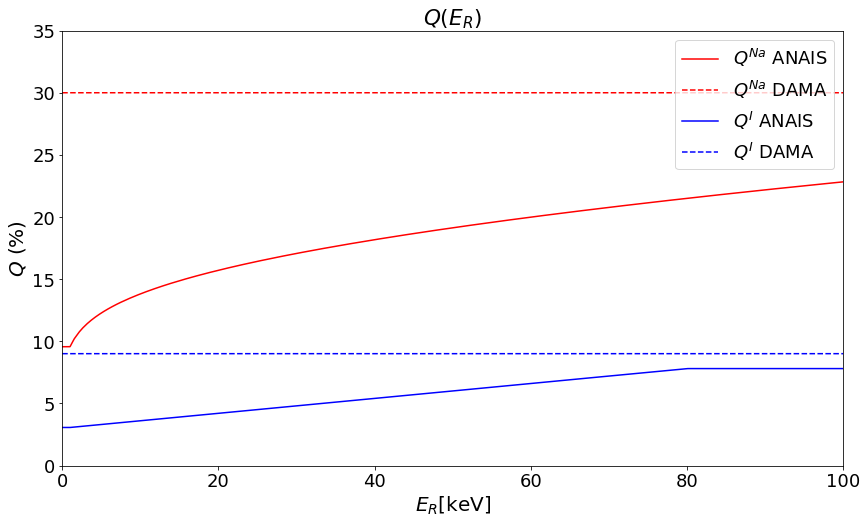

In [14]:
plt.figure(figsize=(14, 8))

energy_ee = np.arange(0,50,0.001)
qfNa = getQFNa(energy_ee)
qf_NA_DAMA=0.3*np.ones(len(qfNa))
energy_er=energy_ee
for i in range (len(energy_ee)):
    energy_er[i]=energy_ee[i]/qfNa[i]
ax = plt.subplot()
ax.plot(energy_er,qfNa*100,c="red", label = "$Q^{Na}$ ANAIS")
ax.plot(energy_er,qf_NA_DAMA*100,c="red",ls='--', label = "$Q^{Na}$ DAMA")

qfI = getQFI(energy_ee)
qf_I_DAMA=0.09*np.ones(len(qfI))

for i in range (len(energy_ee)):
    energy_er[i]=energy_ee[i]/qfI[i]

ax.plot(energy_er,qfI*100,c="blue", label = "$Q^{I}$ ANAIS")
ax.plot(energy_er,qf_I_DAMA*100,c="blue",ls='--', label = "$Q^{I}$ DAMA")
ax.set_title(r'$Q(E_R)$')
ax.set_ylabel(r'$Q$ (%)',fontsize=20)
ax.set_xlabel(r'$E_{R}$'+ '[keV]',fontsize=20)
ax.set_xlim(0,100)
ax.set_ylim(0,35)
ax.legend(loc='upper right')

Modificamos la funcion rate para incluir el factor de quenching y definimos una nueva funcion **rate_ee**:

In [15]:
#################
# Ritmo diferencial (Teniendo en cuenta el Quenching, Energía en ee) (en c/kevee/kg/d) 
# E en keV
# A: numero masico
# mW: Masa del Wimp en GeV/c^2
# sigmaSI: Seccion eficaz spin independent en cm^2
#################

def rate_ee(Eee,t,A,mW,sigmaSI,Q=1):
    E=Eee/Q
    retval=rate(E,t,A,mW,sigmaSI)
    retval/=Q
    return retval

Hacemos lo mismo para las demas funciones, definiendo sus versiones para trabajar con energia electron equivalent. Tambien definimos una funcion para calcular el ritmo usando los Q de DAMA.

In [16]:
#########################
#########################
# Ritmo diferencial en detector NaI (en c/kevee/kg/d) 
# E: en keVee
# t: tiempo en dias desde el 22 de marzo
# mW: Masa del Wimp en GeV/c^2
# sigmaSI: Seccion eficaz spin independent en cm^2
# QNa es el factor de Quenching a energía Eee(keVee) para Na
# QI es el factor de Quenching a energía Eee(keVee) para I

def rateNaI_ee(Eee,t,mW,sigmaSI, QNa=1, QI=1):
  # convert Eee to keV_NR
  rateNa = rate_ee(Eee,t,23,mW,sigmaSI,QNa)
  rateI = rate_ee(Eee,t,127,mW,sigmaSI,QI)
 
  return (rateNa*23.+rateI*127.)/(23.+127.)

#########################
#########################
# Ritmo total, integrado entre Eiee y Efee (en c/kg/d)
# Eiee, Efee: Energías inicial y final en keVee
# t: tiempo en dias desde el 22 de marzo
# A: numero masico
# mW: Masa del Wimp en GeV/c^2
# sigmaSI: Seccion eficaz spin independent en cm^2

def totalRate_NaI_ee(Eiee,Efee,t,mW,sigmaSI):
  energy_ee = np.arange(Eiee,Efee,0.1)
  qfNa = getQFNa(energy_ee)
  qfI = getQFI(energy_ee)
  rates = np.array([
        rateNaI_ee(e, t, mW, sigmaSI, qna, qi)
        for e, qna, qi in zip(energy_ee, qfNa, qfI)
    ])
  return rates.sum()*0.1

#########################
#########################
# Ritmo total, integrado entre Eiee y Efee (en c/kg/d)
# Eiee, Efee: Energías inicial y final en keVee
# t: tiempo en dias desde el 22 de marzo
# A: numero masico
# mW: Masa del Wimp en GeV/c^2
# sigmaSI: Seccion eficaz spin independent en cm^2

def totalRate_NaI_ee_DAMA(Eiee,Efee,t,mW,sigmaSI):
  energy_ee = np.arange(Eiee,Efee,0.1)
  qfNa = 0.3
  qfI = 0.09
  rates = np.array([
        rateNaI_ee(e, t, mW, sigmaSI, qfNa, qfI)
        for e in energy_ee
    ])
  return rates.sum()*0.1

Para calcular el numero de cuentas $N$, tenemos que multiplicar el ritmo por la exposicion total, es decir multiplicar por la masa del detector en $kg$ y por el tiempo total de exposicion en dias.

$$N_{teo}\left[cts\right]=R \left[\textup{cts}\cdot d^{-1} \cdot kg^{-1}\right] \cdot M_{det} \left[ kg \right] \cdot T_{exp}  \left[ d \right]$$

Lo implementamos en la funcion **numero_cuentas_teo**:

Ojo porque no es lo mismo calcular el numero de cuentas de cada detector y luego sumarlos que calcular el numero de cuentas sumando la masa de todos los detectores y su exposicion.\

Primer Caso:

$$N_{tot,1}=\sum_i^9 R \cdot t_i\cdot m_{det} = R \cdot m_{det} \sum_i^9 t_i$$

Segundo Caso:

$$N_{tot,2}=R\cdot \sum_i^9 m_{det} \cdot \sum_i^9 t_i = R \cdot 9m_{det} \cdot \sum_i^9 t_i=9\left[R \cdot m_{det} \sum_i^9 t_i\right]$$

El numero de cuentas en el segundo caso es 9 veces mayor que en el primer caso

In [17]:
#########################
#########################
# Numero de cuentas total, integrado entre Eiee y Efee (en cts)
# Eiee, Efee: Energías inicial y final en keVee
# t: tiempo en dias desde el 22 de marzo
# mW: Masa del Wimp en GeV/c^2
# sigmaSI: Seccion eficaz spin independent en cm^2
# texp: Tiempo de exposicion en dias
# mexp: Masa del detector de NaI en kg

def numero_cuentas_teo(Eiee,Efee,t,mW,sigmaSI,array_det=np.ones(9,dtype=int)):
  Matriz=np.eye(9)
  exp=0
  for i in range(9):
          if(array_det[i]==1):
            texp=calcula_t_exposicion(i)
            mexp=calcula_m_exposicion(i)
            exp+=texp*mexp
  retval=totalRate_NaI_ee(Eiee,Efee,t,mW,sigmaSI)
  return retval*exp

### Ejemplo
Calculamos el numero de cuentas para 1200 dias en un detector de 100 kg, en un intervalo de energias de entre 1 y 6 keV_ee, utilizando los mismos datos que en los ejemplos anteriores:

In [13]:
# Dia promedio

timeMax=72.9 
timeMin=255.5 
timeAvg=(timeMax+timeMin)/2.

#Valores cualquiera de masa del WIMP y de la seccion eficaz

mW=100          #   masa wimp (geV/c^2)
si=1e-45        #   seccion eficaz SI(cm^-2)

#Valores de las energias inicial y final del intervalo de integracion

E_i=1
E_f=6

# Masa = 100 kg , Tiempo - 1200 dias

M_det=100
T_exp=1200

#Calculamos el numero de cuentas esperado
N_teo=numero_cuentas_teo(E_i,E_f,timeAvg,mW,si)

print(N_teo)




41.37402673887348
